In [80]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [81]:
cab_data = pd.read_csv("Cab_Data.csv")

In [82]:
print(cab_data.shape)

(359392, 8)


In [146]:
city_data = pd.read_csv("City.csv")

In [147]:
print(city_data)

                City  Population   Users
0        NEW YORK NY     8405837  302149
1         CHICAGO IL     1955130  164468
2     LOS ANGELES CA     1595037  144132
3           MIAMI FL     1339155   17675
4     SILICON VALLEY     1177609   27247
5      ORANGE COUNTY     1030185   12994
6       SAN DIEGO CA      959307   69995
7         PHOENIX AZ      943999    6133
8          DALLAS TX      942908   22157
9         ATLANTA GA      814885   24701
10         DENVER CO      754233   12421
11         AUSTIN TX      698371   14978
12        SEATTLE WA      671238   25063
13         TUCSON AZ      631442    5712
14  SAN FRANCISCO CA      629591  213609
15     SACRAMENTO CA      545776    7044
16     PITTSBURGH PA      542085    3643
17     WASHINGTON DC      418859  127001
18      NASHVILLE TN      327225    9270
19         BOSTON MA      248968   80021


In [84]:
customer_ID = pd.read_csv("Customer_ID.csv")

In [85]:
Transaction_ID = pd.read_csv("Transaction_ID.csv")


In [86]:
#check the sizes of each Pandas Dataframe created
print(cab_data.shape)
print(city_data.shape)
print(customer_ID.shape)
print(Transaction_ID.shape)

(359392, 8)
(20, 3)
(49171, 4)
(440098, 3)


In [87]:
# merge Transaction_ID and cab_data on column Transaction ID:
merged_data = pd.merge(cab_data,Transaction_ID,on='Transaction ID',how='outer',indicator=True)


In [88]:
# merge customer ID column found in both Customer_ID and Transaction ID dataframes
merged_transaction_data = pd.merge(customer_ID, Transaction_ID, on="Customer ID", how="inner")

In [89]:
# remove duplicates from merged data
print(merged_data.drop_duplicates())


        Transaction ID  Date of Travel Date_of_travel modified     Company  \
0             10000013         42371.0              02/01/2016  Yellow Cab   
1             10000029         42371.0              02/01/2016  Yellow Cab   
2             10000030         42371.0              02/01/2016    Pink Cab   
3             10000041         42371.0              02/01/2016  Yellow Cab   
4             10000045         42371.0              02/01/2016  Yellow Cab   
...                ...             ...                     ...         ...   
440093        10440078             NaN                     NaN         NaN   
440094        10440091             NaN                     NaN         NaN   
440095        10440102             NaN                     NaN         NaN   
440096        10440103             NaN                     NaN         NaN   
440097        10440108             NaN                     NaN         NaN   

                  City  KM Travelled  Price Charged  Cost of Tr

In [90]:
print(merged_transaction_data.drop_duplicates())

        Customer ID  Gender  Age  Income (USD/Month)  Transaction ID  \
0             29290    Male   28               10813        10000011   
1             29290    Male   28               10813        10351127   
2             29290    Male   28               10813        10412921   
3             27703    Male   27                9237        10000012   
4             27703    Male   27                9237        10320494   
...             ...     ...  ...                 ...             ...   
440093        12490    Male   33               18713        10439799   
440094        14971    Male   30               15346        10439820   
440095        41414    Male   38                3960        10439838   
440096        41677    Male   23               19454        10439840   
440097        39761  Female   32               10128        10439846   

       Payment_Mode  
0              Card  
1              Cash  
2              Card  
3              Card  
4              Card  
...

In [113]:
yellowcab_df = merged_data[merged_data['Company'] == 'Yellow Cab']
pinkcab_df = merged_data[merged_data['Company'] == 'Pink Cab']

yellowcab_df.to_csv("yellowcab.csv")
pinkcab_df.to_csv("pinkcab.csv")

        Transaction ID  Date of Travel Date_of_travel modified     Company  \
0             10000013         42371.0              02/01/2016  Yellow Cab   
1             10000029         42371.0              02/01/2016  Yellow Cab   
3             10000041         42371.0              02/01/2016  Yellow Cab   
4             10000045         42371.0              02/01/2016  Yellow Cab   
5             10000048         42371.0              02/01/2016  Yellow Cab   
...                ...             ...                     ...         ...   
359383        10439843         43465.0              31/12/2018  Yellow Cab   
359388        10439984         43465.0              31/12/2018  Yellow Cab   
359389        10440028         43465.0              31/12/2018  Yellow Cab   
359390        10440034         43465.0              31/12/2018  Yellow Cab   
359391        10440093         43465.0              31/12/2018  Yellow Cab   

                 City  KM Travelled  Price Charged  Cost of Tri

In [173]:
# calculate yellowcab_df profit
yellowcab= pd.read_csv("yellowcab.csv")

yellowcab["Profit"] = yellowcab["Price Charged"] - yellowcab['Cost of Trip']




print(yellowcab["Profit"])

0         172.5380
1         514.7252
2         646.1576
3          29.2600
4         582.2420
            ...   
274676    137.4060
274677    130.3160
274678    -54.2104
274679    177.3908
274680    112.9240
Name: Profit, Length: 274681, dtype: float64


<Figure size 1200x600 with 0 Axes>

In [171]:
# calculate pinkcab_df profit
pinkcab= pd.read_csv("pinkcab.csv")

pinkcab["Profit"] = pinkcab["Price Charged"] - pinkcab['Cost of Trip']

print(pinkcab["Profit"])

0        321.420
1        118.330
2        270.490
3         50.625
4        313.690
          ...   
84706      5.310
84707     62.960
84708     53.339
84709    162.998
84710    170.952
Name: Profit, Length: 84711, dtype: float64


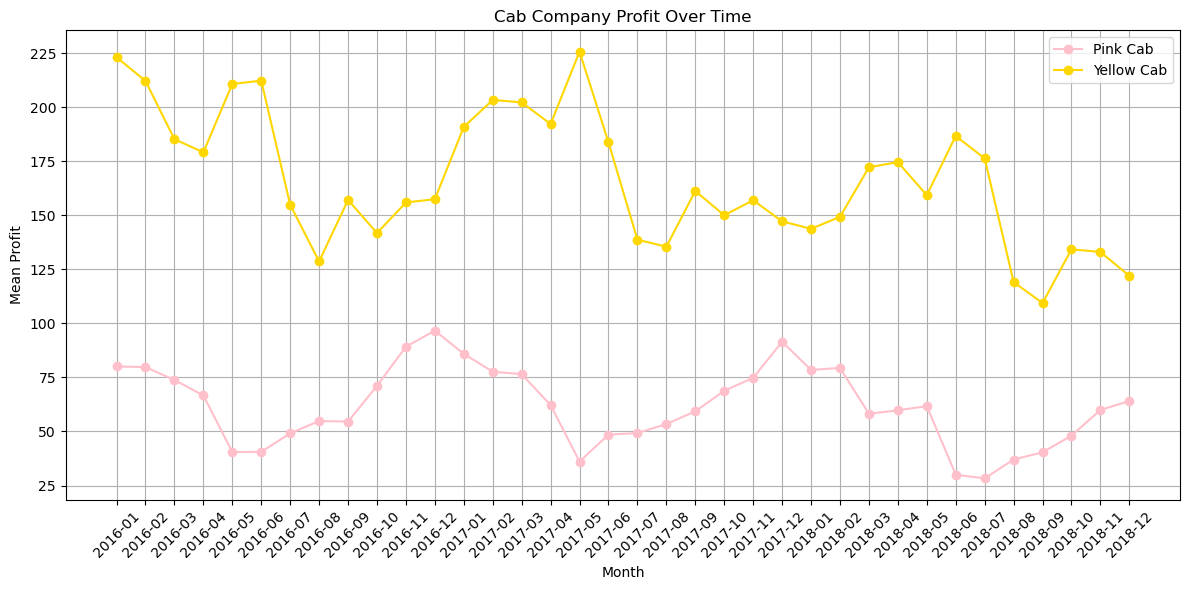

In [175]:
pinkcab['Date_of_travel modified'] = pd.to_datetime(pinkcab['Date_of_travel modified'], format='%d/%m/%Y')
yellowcab['Date_of_travel modified'] = pd.to_datetime(yellowcab['Date_of_travel modified'], format='%d/%m/%Y')


pinkcab['Month'] = pinkcab['Date_of_travel modified'].dt.strftime('%Y-%m')
yellowcab['Month'] = yellowcab['Date_of_travel modified'].dt.strftime('%Y-%m')


plt.figure(figsize=(12, 6))

profit_by_month_pink = pinkcab.groupby('Month')['Profit'].mean()
profit_by_month_yellow = yellowcab.groupby('Month')['Profit'].mean()


plt.plot(profit_by_month_pink.index, profit_by_month_pink.values, label='Pink Cab', marker='o', color='pink')

plt.plot(profit_by_month_yellow.index, profit_by_month_yellow.values, label='Yellow Cab', marker='o', color='gold')

plt.xlabel('Month')
plt.ylabel('Mean Profit')
plt.title('Cab Company Profit Over Time')
plt.xticks(rotation=45)  
plt.legend()

plt.tight_layout()
plt.grid(True)
plt.show()


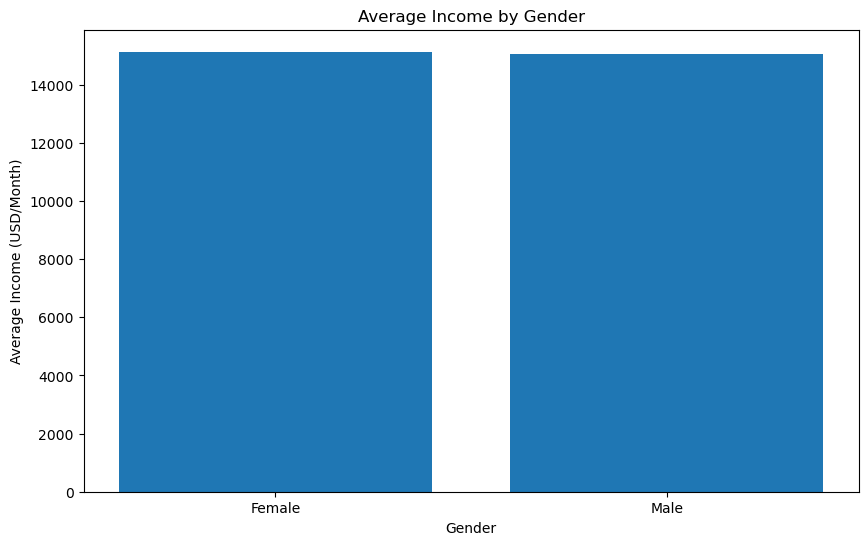

In [157]:
# Create a box plot to visualize the different income distributions per gender 


# Group the data by 'Gender' and calculate the mean income for each gender
income_by_gender = merged_transaction_data.groupby('Gender')['Income (USD/Month)'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(income_by_gender['Gender'], income_by_gender['Income (USD/Month)'])

# Customize the plot (add titles, labels, legends, etc. as needed)
plt.title('Average Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Income (USD/Month)')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary

# Show the plot
plt.show()




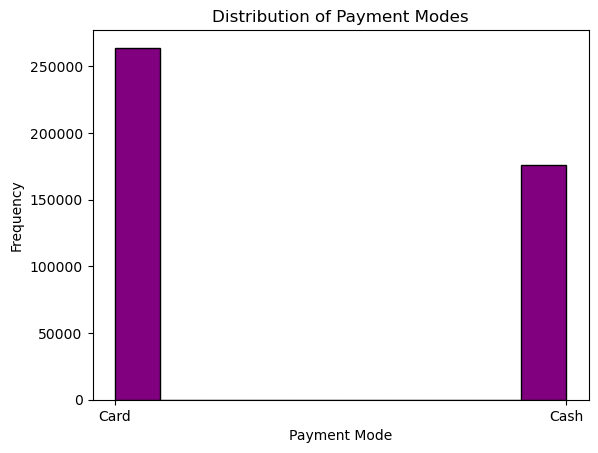

In [176]:
plt.hist(merged_transaction_data["Payment_Mode"], bins=10, color='purple', edgecolor='black')
plt.xlabel('Payment Mode')
plt.ylabel('Frequency')
plt.title('Distribution of Payment Modes')
plt.show()


<Figure size 1000x600 with 0 Axes>

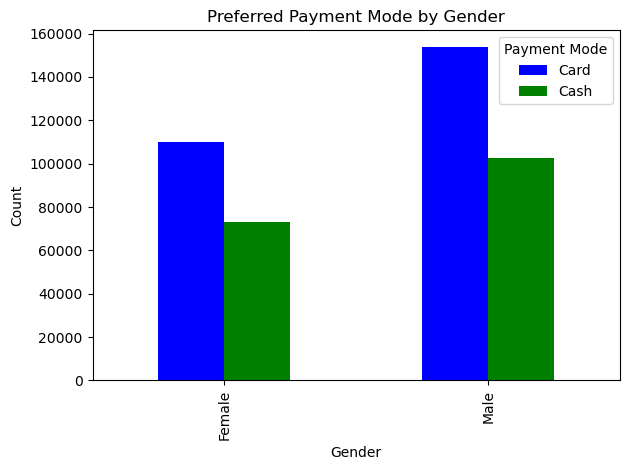

In [180]:
# Calculate the preferred payment mode for each gender
preferred_payment_mode = merged_transaction_data.groupby(['Gender','Payment_Mode']).size().unstack().fillna(0)

# Create a grouped bar plot
plt.figure(figsize=(10, 6))
preferred_payment_mode.plot(kind='bar', stacked=False, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Preferred Payment Mode by Gender')
plt.legend(title='Payment Mode', loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()


Analyzing Cab Data

In [97]:
cab_data.nunique()

Transaction ID             359392
Date of Travel               1095
Date_of_travel modified      1095
Company                         2
City                           19
KM Travelled                  874
Price Charged               99176
Cost of Trip                16291
dtype: int64

In [98]:
yellowcab_df.nunique()

Transaction ID             274681
Date of Travel               1095
Date_of_travel modified      1095
Company                         1
City                           19
KM Travelled                  874
Price Charged               96854
Cost of Trip                 9808
Customer ID                 42870
Payment_Mode                    2
_merge                          1
dtype: int64

In [99]:
pinkcab_df.nunique()

Transaction ID             84711
Date of Travel              1095
Date_of_travel modified     1095
Company                        1
City                          19
KM Travelled                 874
Price Charged              47008
Cost of Trip                9759
Customer ID                28508
Payment_Mode                   2
_merge                         1
dtype: int64

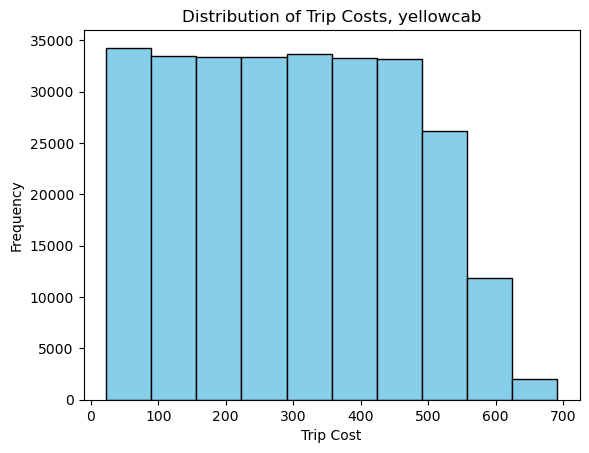

In [123]:
plt.hist(yellowcab_df["Cost of Trip"], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Trip Cost')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Costs, yellowcab')
plt.show()


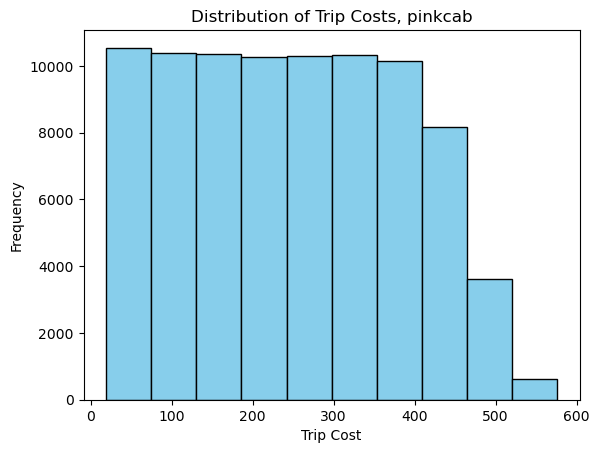

In [124]:
plt.hist(pinkcab_df["Cost of Trip"], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Trip Cost')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Costs, pinkcab')
plt.show()


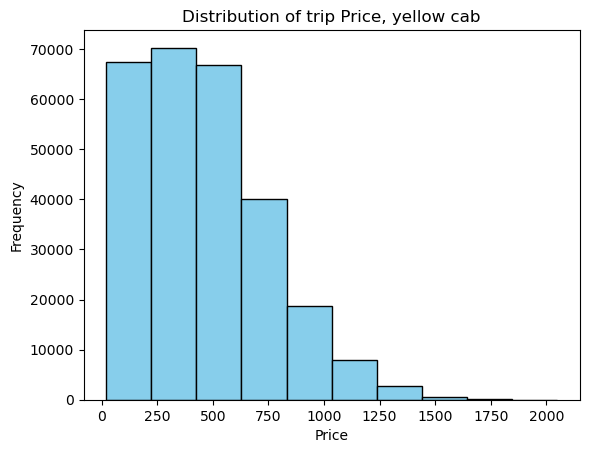

In [126]:
plt.hist(yellowcab_df["Price Charged"], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of trip Price, yellow cab')
plt.show()


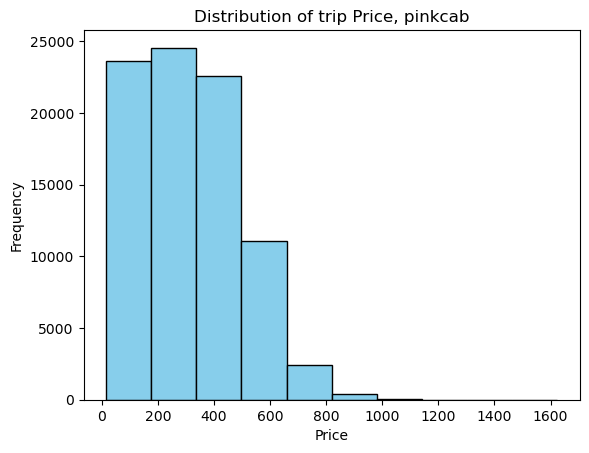

In [127]:
plt.hist(pinkcab_df["Price Charged"], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of trip Price, pinkcab')
plt.show()

On average, the trip costs are the same for both companies, but yellow cab is charging much more for the trips. Also, yellowcab company has much more Transaction IDs, meaning it is picking up more people


In [75]:
cab_data["City"].unique()


array(['CHICAGO IL', 'NEW YORK NY', 'LOS ANGELES CA', 'WASHINGTON DC',
       'ATLANTA GA', 'SAN DIEGO CA', 'AUSTIN TX', 'DALLAS TX',
       'BOSTON MA', 'SEATTLE WA', 'PHOENIX AZ', 'DENVER CO',
       'SILICON VALLEY', 'NASHVILLE TN', 'PITTSBURGH PA', 'ORANGE COUNTY',
       'TUCSON AZ', 'SACRAMENTO CA', 'MIAMI FL'], dtype=object)

In [76]:
correlation = cab_data.corr()

C:\Users\sally\AppData\Local\Temp\ipykernel_20052\3967129801.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = cab_data.corr()


<Axes: >

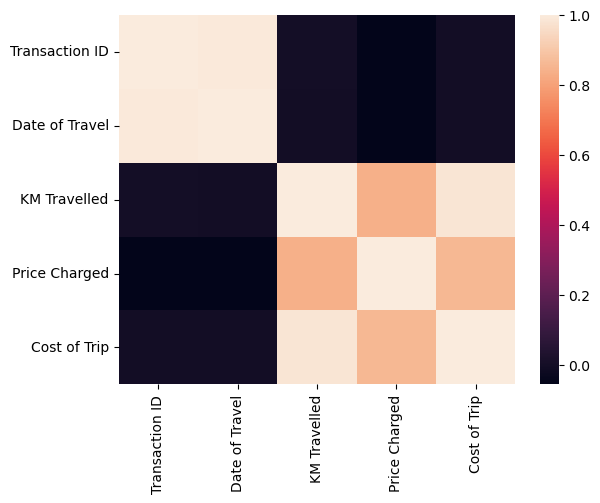

In [77]:
sns.heatmap(correlation)

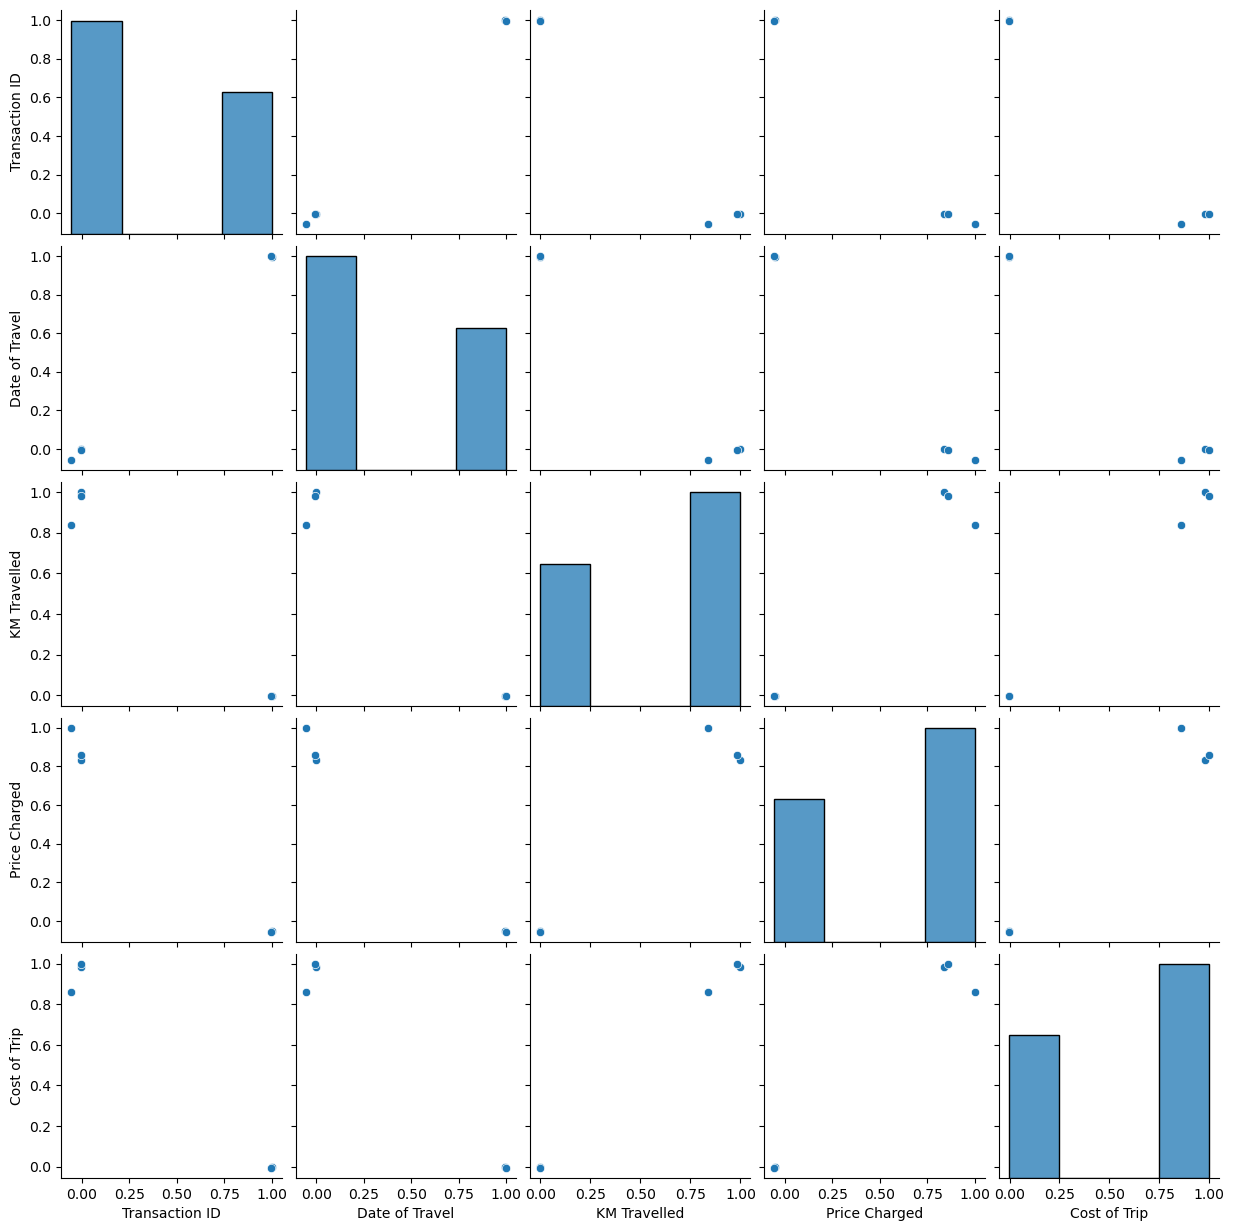

In [78]:
sns.pairplot(correlation)

Analyzing City Data

In [79]:
city_data.nunique()

City          20
Population    20
Users         20
dtype: int64

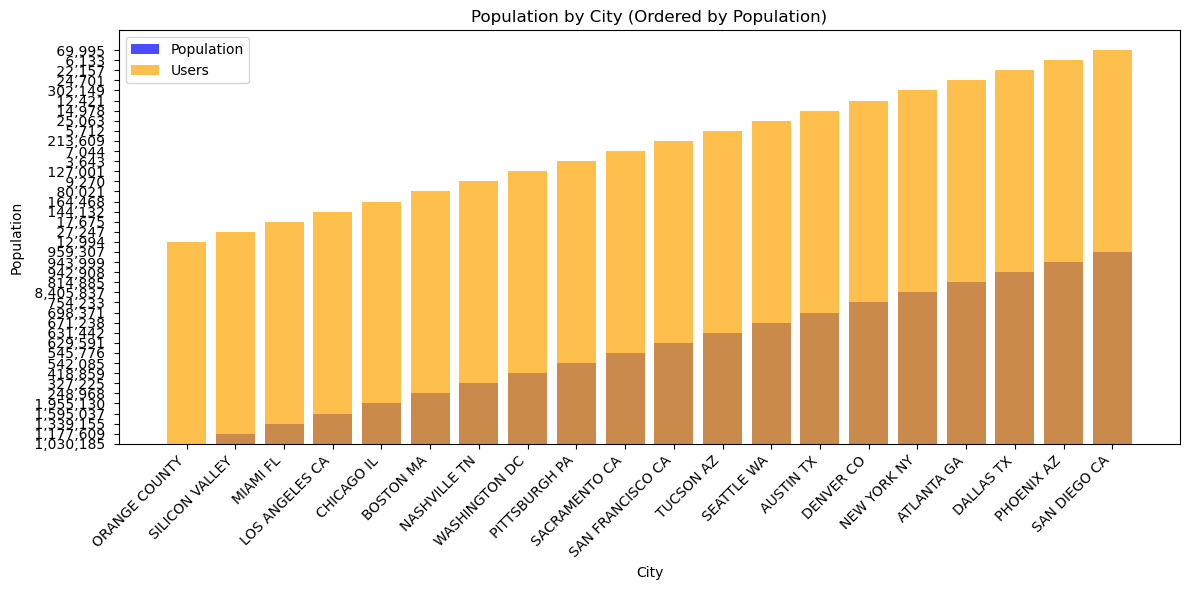

In [80]:
# Sort the data by population in ascending order
sorted_data = city_data.sort_values(by='Population')

# Create a bar chart for population
plt.figure(figsize=(12, 6))
plt.bar(sorted_data['City'], sorted_data['Population'], color='blue', alpha=0.7, label='Population')
plt.xlabel('City')
plt.ylabel('Population')
plt.title('Population by City (Ordered by Population)')
plt.xticks(rotation=45, ha='right')

# Add a bar chart for users
plt.bar(sorted_data['City'], sorted_data['Users'], color='orange', alpha=0.7, label='Users')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [149]:
#Calculate the percentage of cab users relative to the population

city_data["cab_user_percentage"] = (city_data["Users"]).div(city_data["Population"])*100

#Print the resulting DataFrame
print(city_data)


                City  Population   Users  cab_user_percentage
0        NEW YORK NY     8405837  302149             3.594514
1         CHICAGO IL     1955130  164468             8.412126
2     LOS ANGELES CA     1595037  144132             9.036279
3           MIAMI FL     1339155   17675             1.319862
4     SILICON VALLEY     1177609   27247             2.313756
5      ORANGE COUNTY     1030185   12994             1.261327
6       SAN DIEGO CA      959307   69995             7.296413
7         PHOENIX AZ      943999    6133             0.649683
8          DALLAS TX      942908   22157             2.349858
9         ATLANTA GA      814885   24701             3.031225
10         DENVER CO      754233   12421             1.646839
11         AUSTIN TX      698371   14978             2.144705
12        SEATTLE WA      671238   25063             3.733847
13         TUCSON AZ      631442    5712             0.904596
14  SAN FRANCISCO CA      629591  213609            33.928217
15     S

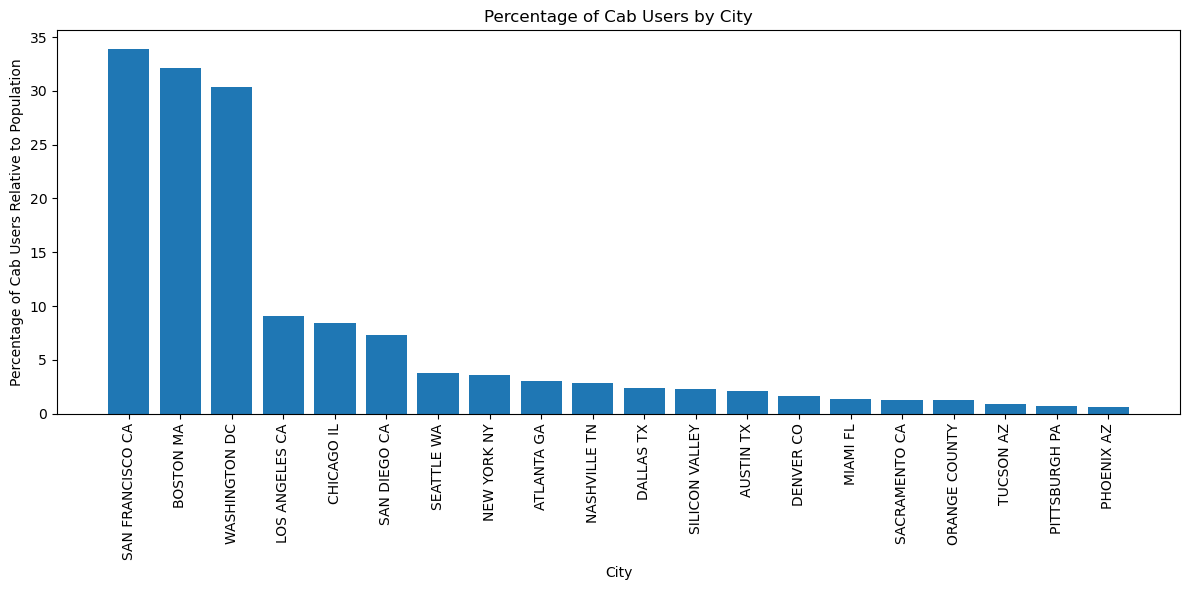

In [150]:
#Graphing the Results:

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

city_data = city_data.sort_values(by="cab_user_percentage", ascending=False)

plt.bar(city_data["City"], city_data["cab_user_percentage"])
plt.xticks(rotation=90) 
plt.xlabel('City')
plt.ylabel('Percentage of Cab Users Relative to Population')
plt.title('Percentage of Cab Users by City')

plt.tight_layout() 
plt.show()


Analyzing Customer Data

In [82]:
customer_ID.nunique()

Customer ID           49171
Gender                    2
Age                      48
Income (USD/Month)    23341
dtype: int64

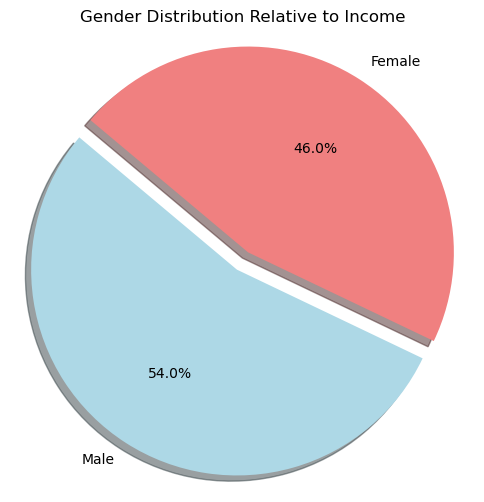

In [13]:

# Sample data (replace with your actual data)
male_count = 26562
female_count = 22609

# Calculate the total count
total_count = male_count + female_count

# Calculate the percentages
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

# Create labels and percentages
labels = ['Male', 'Female']
sizes = [male_percentage, female_percentage]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Gender Distribution Relative to Income')
plt.axis('equal')

plt.show()


Analyzing Transaction Data

In [14]:
Transaction_ID.nunique()

Transaction ID    440098
Customer ID        49171
Payment_Mode           2
dtype: int64

In [15]:
payment_mode_counts = Transaction_ID['Payment_Mode'].value_counts()
print(payment_mode_counts)

Card    263991
Cash    176107
Name: Payment_Mode, dtype: int64


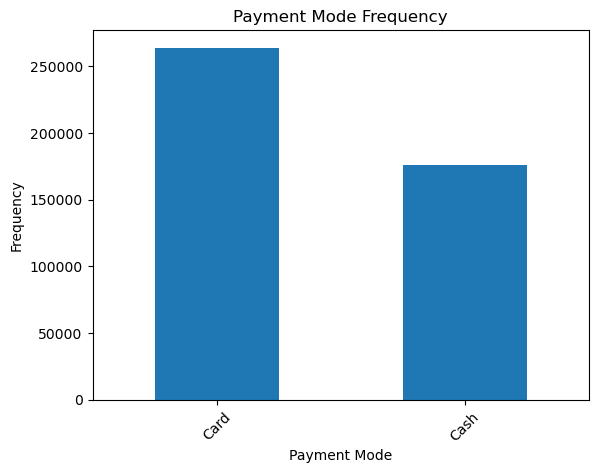

In [16]:
payment_mode_counts.plot(kind="bar")
plt.xlabel('Payment Mode')
plt.ylabel('Frequency')
plt.title('Payment Mode Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()
